# TECHNISCHE UNIVERSITÄT MÜNCHEN - Sonnendrücker & Possanner Lectures

## Exercise sheet Nº1

The aim is to solve numerically the Poisson Equation:
$$-\phi''(x) = \rho(x) , x\in[a,b]\subset Reals \space\space\space\space\space (1)$$\
For given $\rho\in[a,b]$ and different types of boundary conditions. The domain $[a,b]$ is divided into $N$ equally spaced cells, yielding $N+1$ grid points $x_i \in [a,b]$, $i=0,...,N$.

### 1. Dirichlet boundary conditions

The boundary conditions of $\phi$ are:
$$\phi(a) = \alpha, \space\space\space\space\space \phi(b)=\beta \space\space\space\space\space(2)$$

#### a) Show that (1) and (2) have a unique solution.

Suppose that $\phi$ and $\psi$ are both solutions of the Poisson equation (1) with the same boundary conditions:

$$-\phi''(x) = \rho(x), \space\space \space\space -\psi''(x) = \rho(x) \space\space \space\space (3)$$
$$ \phi(a)=\psi(a)=\alpha, \space\space \space\space \phi(b)=\psi(b)=\beta$$

Then, we define function $\eta := \phi-\psi$. Taking the laplacian operator (Second derivative in 1D) to $\eta$ we get:

$$\eta''(x) = \phi''(x)-\psi''(x) = -\rho(x)+\rho(x) = 0$$
$$ \eta''(x)=0  \space\space \space\space (4)$$

Multiplying (4) by $\eta$ we get:

$$ \eta\eta''(x)=0 \longrightarrow \frac{d}{dx}(\eta\eta')-\eta' \eta' = 0$$
$$ \frac{d}{dx}(\eta\eta') = (\eta')^2 $$
$$ d(\eta\eta') = (\eta')^2 dx  \space\space \space\space (5) $$

Integrating equation (5) in the interval $[a,b]$:

$$ \int_a^b d(\eta\eta') = \int_a^b(\eta')^2 dx $$
$$ \eta(b)\eta'(b)-\eta(a)\eta'(a) = \int_a^b(\eta')^2 dx \space\space \space\space (6) $$

From equation (3) we get that $\eta(a) = \phi(a) - \psi(a) = 0$ and $\eta(b) = \phi(b) - \psi(b) = 0$. So the left hand side of (6) is 0, and we get:

$$ \int_a^b(\eta')^2 dx = 0 \space\space \space\space (7) $$

Since the function $(\eta'(x))^2>0$ takes only positive values in the interval $[a,b]$, and it's area under the curve is 0, then $(\eta'(x))^2 = 0$ in the interval $[a,b]$. If $(\eta'(x))^2 = 0 \longrightarrow \eta'(x) = 0 $ in the interval $[a,b]$. From this follows that:

$$ \eta'(x) = 0 \longrightarrow  \eta(x) = Constant $$

The constant value can be determined from the boundary conditions (3), $\eta(a) = \phi(a) - \psi(a) = 0$ and $\eta(b) = \phi(b) - \psi(b) = 0$:

$$\eta(x) = \eta(a) = \eta(b) = 0 $$
$$ \eta(x) = \phi(x)-\psi(x) = 0 $$
$$ \phi(x) = \psi(x)$$

This implies that whatever two functions that are solutions of the Poisson equation with the same Dirichlet boundary conditions must be the same (Uniqueness theorem).

#### b) Write a finite difference solver for (1) and (2) for arbitrary $a, b, \alpha, \beta, N$ and $\rho$ by approximating the Laplacian at the grid points $i=1,...,N-1$ via:

$$ \phi''(x_i) \approx \frac{1}{h^2}(\phi_{i+1} - 2\phi_i + \phi_{i-1}) $$

In [1]:
# Import Poisson Solver module PoissoncmdSolvers.py
import sys

sys.path.append('C:\\Users\\erik_\\Documents\\erik documents\\Programas\\PlasmaSimulations\\src')
# sys.path.append('..\\PlasmaSimulations\\src') # replace .. by the concrete path to the PlasmaSimulations folder

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import PoissonSolvers

Model:
$$ \rho(x) = -x $$

#### Example 1:

In [2]:
a = 0.0 # Left mesh point
b = 3.0 # Right mesh point
N = 300 # Number of cells

# Boundary Conditions:
phi0 = 20.0 # Value of phi in x0
phiN = 0.0  # Value of phi in xL

# Rho function
rho_function = lambda x: -x

In [3]:
# Create object
obj1 =  PoissonSolvers.Poisson1D_Dirichlet_BC_Solver(a,b,phi0,phiN,N,rho_function)

# Run Solver and obtain the solutions
sol1 = obj1.run()

# Calculate the eigenvectors:
diag1 = 2*np.ones(N - 1 , dtype = float)
diag2 = -1*np.ones(N - 2 , dtype = float)
diag3 = -1*np.ones(N - 2 ,dtype = float)
matrixA = obj1.A_Matrix(diag1,diag2,diag3,0,1,-1)
EigVals, EigVec = obj1.CalculateEigenSystem(matrixA)

Analytical Solution to the model:
$$ \phi(x) = \frac{1}{6}(120 - 49 x + x^3) $$

In [4]:
analytical_sol1 = lambda x: (1/6)*(120 - 49*x + x**3)

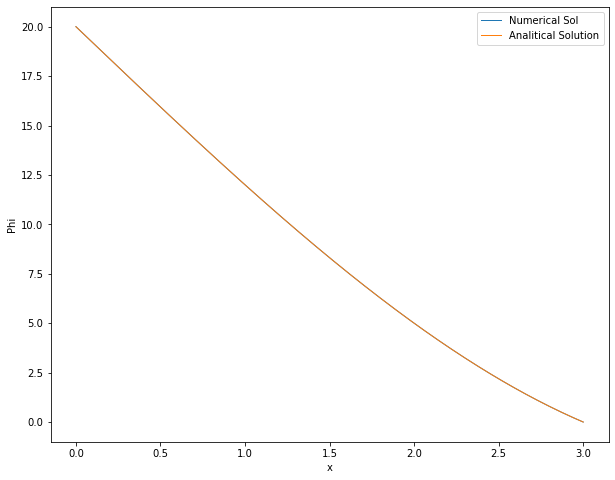

In [5]:
x_coords = obj1.grid_points(a,b,b/N)

analytical_values = analytical_sol1(x_coords)

plt.figure(figsize=(10,8))
plt.plot(x_coords,sol1,linewidth=1 , label='Numerical Sol')
plt.plot(x_coords,analytical_values,linewidth=1,label='Analitical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
plt.legend()
plt.show()

#### c) Set $a=0$, $b=2\pi$, $\rho(x)=2\sin(x)+x\cos(x)$, $\alpha = 0$, $\beta=2\pi$ and solve for $N=8,16,32,64,128,256$. Save the errors with the true solution $\phi(x) = x\cos(x)$ in the $L^1,L^2 and L^\infty$ norms.

In [6]:
a2 = 0.0 # Left mesh point
b2 = 2.0*np.pi # Right mesh point
N2 = 128 # Number of cells

# Boundary Conditions:
phi02 = 0.0 # Value of phi in x0
phiN2 = 2.0*np.pi  # Value of phi in xL

# Rho function
rho_function2 = lambda x: 2.0*np.sin(x) + x*np.cos(x)

# Create object
obj2 = PoissonSolvers.Poisson1D_Dirichlet_BC_Solver(a2,b2,phi02,phiN2,N2,rho_function2)

# Run Solver and obtain the solutions
sol2 = obj2.run()

Analytical Solution to the model:
$$ \phi(x) = x\cos(x) $$

In [7]:
analytical_sol2 = lambda x: x*np.cos(x)

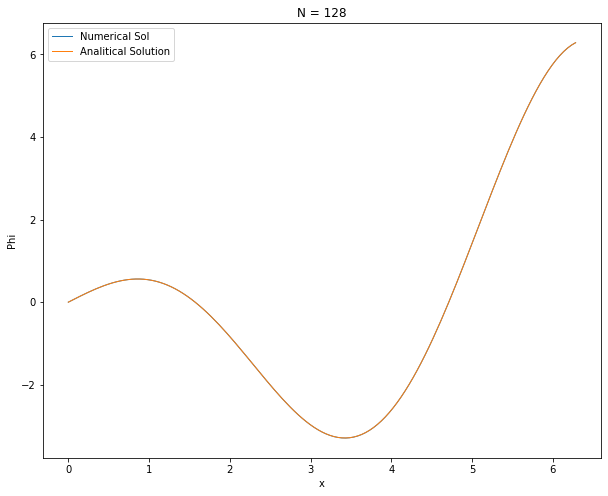

In [8]:
x_coords2 = obj2.grid_points(a2,b2,b2/N2)

analytical_values2 = analytical_sol2(x_coords2)

plt.figure(figsize=(10,8))
plt.plot(x_coords2,sol2,linewidth=1 , label='Numerical Sol')
plt.plot(x_coords2,analytical_values2,linewidth=1,label='Analitical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
plt.title('N = 128')
plt.legend()
plt.show()

In [9]:
def error_func(y1,y2):
    '''Calculate the difference between to arrays'''
    y1 = np.array(y1)
    y2 = np.array(y2)
    if np.array(y1).shape == np.array(y2).shape:
        diff = y1-y2
        return diff
    else:
        print('Arrays must have the same dimension')

In [10]:
N_values1 = 2**np.array(range(3,9)) # N values to test
print(N_values1)

[  8  16  32  64 128 256]


In [11]:
# Iteration over all N, calculation of all solutions and errors

def iteration_over_N(N_Values,Solver,X0,XN,BC1,BC2,RHO_FUNCTION,AnalyticalSolFunction):
    
    ''' This function takes a list of the sizes of the grid discretization N_Values, ex: N_Values=[10,100,200,300]
    and solves the poisson equation with a given Solver(Dirichlet or Neumann) with end points of the grid
    X0 and XN, and boundary conditions BC1, BC2. A RHO_FUNCTION must be specified and the analytical solution
    of the model to calculate the error.'''

    Errors = [] # List to store the mean square errors
    solutions = [] # List to store the solutions
    X_coordinates = [] # List to store the coordinates for each mesh size

    for N_val in N_Values:
        # Create object
        obj =  Solver(X0,XN,BC1,BC2,N_val,RHO_FUNCTION)

        # Run Solver and obtain the solutions
        sol = obj.run()
        solutions.append(sol) # Store the solution

        # Coordinates
        x_coordss = obj.grid_points(X0,XN,XN/N_val)
        X_coordinates.append(x_coordss) #Store the grid

        # Analytical Solution
        analytical_sols = AnalyticalSolFunction(x_coordss)

        # Error
        Errors.append(error_func(analytical_sols,sol)) #Store the error for given N
    
    return Errors,solutions,X_coordinates
    

In [12]:
Errors1,solutions1,X_coordinates1 = iteration_over_N(N_values1,PoissonSolvers.Poisson1D_Dirichlet_BC_Solver,a2,b2,
                                                       phi02,phiN2,rho_function2,analytical_sol2)

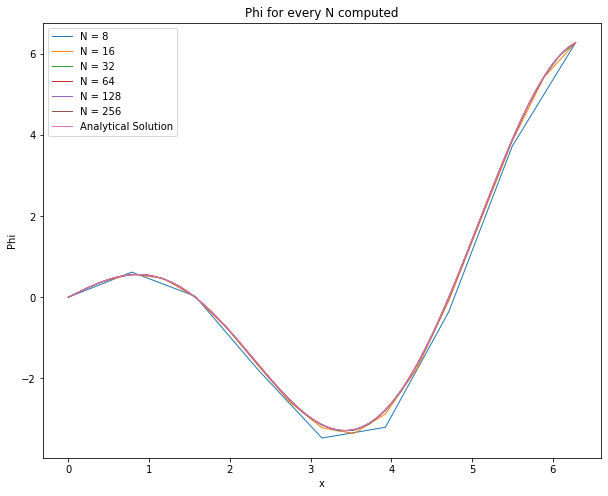

In [13]:
# Plot the solution for every N
plt.figure(figsize=(10,8))

for x_coordinates,phi_values,N_vals in zip(X_coordinates1,solutions1,N_values1):    
    plt.plot(x_coordinates,phi_values,linewidth=1 , label = f'N = {N_vals}')
    
plt.plot(x_coordinates,analytical_sol2(x_coordinates),linewidth=1,label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
# plt.xlim([3, 4])
# plt.ylim([-4, -2])
plt.title('Phi for every N computed')
plt.legend()
plt.show()

#### d) Plot the errors as a function of h. Compute the expected convergence rate.

In [14]:
# h values calculated from the N values defined above
h_vals = b2/N_values1
print(h_vals)

[0.78539816 0.39269908 0.19634954 0.09817477 0.04908739 0.02454369]


We can observe that the mean squared error decreases as h $\rightarrow$ 0.

Determine the $L^1$, $L^2$ and $L^\infty$ norms:

In [15]:
def calculate_norm(vector,norm_number):
    '''vector: Array or vector to which you want to determine the norm: 1,2 or inf
       norm_number: Norm order'''
    if type(norm_number) == str:
        return np.linalg.norm(vector,ord = float(norm_number))
    else:
        return np.linalg.norm(vector , ord = norm_number)

In [16]:
def store_norms(list_errors):
    norms = [[],[],[]]
    for errors in list_errors:
        norms[0].append(calculate_norm(errors,1)) # Calculate and store norm L^1
        norms[1].append(calculate_norm(errors,2)) # Calculate and store norm L^2
        norms[2].append(calculate_norm(errors,'inf')) # Calculate and store norm L^infinity
    return norms

In [17]:
norms = store_norms(Errors1)

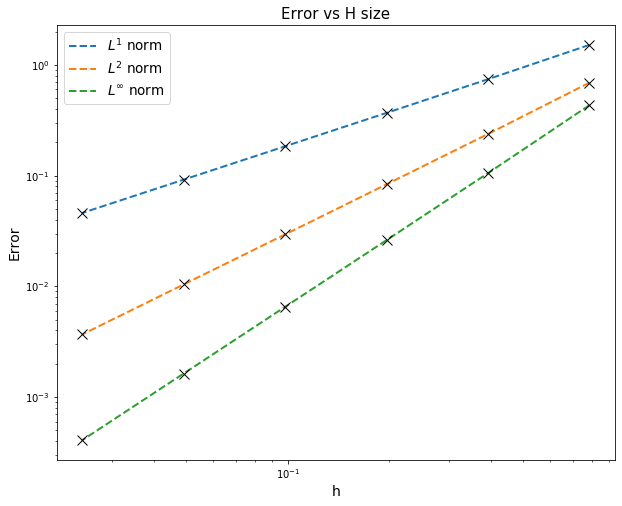

In [18]:
# Plot the errors vs h
fig , ax = plt.subplots(figsize = (10,8))
colors = ['tab:blue','tab:orange','tab:green']
norm_names = ['1','2','\infty']
for idx,norma in enumerate(norms):
    plt.plot(h_vals,norma,'--',linewidth=2,color = colors[idx] , label = f'$L^{norm_names[idx]}$ norm')
    plt.plot(h_vals,norma,'xk',markersize=10)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('h',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('Error vs H size',fontsize = 15)
plt.legend(fontsize=13.5)
plt.show()

### 2. Mixed boundary conditions

The boundary condition and derivative of $\phi$ are:
$$\phi(a) = \alpha, \space\space\space\space\space \phi'(b)=\gamma \space\space\space\space\space(8)$$

#### Show that (1) and (8) have a unique solution.

The procedure is similar to the proof with Dirichlet boundary conditions. Suppose that $\phi$ and $\psi$ are both solutions of the Poisson equation (1) with the same boundary conditions:

$$-\phi''(x) = \rho(x), \space\space \space\space -\psi''(x) = \rho(x) \space\space \space\space (9)$$
$$ \phi(a)=\psi(a)=\alpha, \space\space \space\space \phi'(b)=\psi'(b)=\gamma$$

Multiplying (4) again by $\eta$ we get:

$$ d(\eta\eta') = (\eta')^2 dx  \space\space \space\space (10) $$

Integrating equation (5) in the interval $[a,b]$:

$$ \int_a^b d(\eta\eta') = \int_a^b(\eta')^2 dx $$
$$ \eta(b)\eta'(b)-\eta(a)\eta'(a) = \int_a^b(\eta')^2 dx \space\space \space\space (11) $$

In this case $\eta'(b)=\phi'(b)-\psi'(b)=0$ and $\eta(a)=\phi(a)-\psi(a)=0$, so, expression (11) still vanishes, and we get equation (7).

$$ \int_a^b(\eta')^2 dx = 0 $$

As before, the condition for this integral to vanish is that:

$$\eta'(x) = 0$$

We separate the function:

$$\eta'(x) = \phi'(x)-\psi'(x)=0$$
$$ \phi'(x)=\psi'(x)\space\space \space\space (12)$$

Rewriting equation (12) and integrating:

$$ \frac{d}{dx}\phi(x)=\frac{d}{dx}\psi(x)\space\space \space\space (13)$$

$$ \int_a^xd\phi(y)=\int_a^xd\psi(y)\space\space \space\space (14)$$

$$ \phi(x)-\phi(a)=\psi(x)-\psi(a)\space\space \space\space (15)$$

Since both functions have one point as the same boundary condition they must be the same.

$$ \phi(x)=\psi(x) $$

#### a) Write a finite difference solver for (1) and (8) with the same parameters as in problem 1.b). Approximate the derivative at the boundary via:

$$ \frac{\phi_{N}-\phi_{N-2}}{2h}=\gamma $$

$$ N \space Unknowns: \\
\phi_1,...,\phi_{N}\\$$
$$ Determined \space by \space the \space N-1 \space equations:\\
\frac{-\phi_{j+1} + 2\phi_j - \phi_{j-1}}{h^2} = \rho(x_j) , 1 \leq j \leq N-1 $$
And the derivative approximation give us Nth equation

This system of equations can be written in matrix form as:
$$ A_h\Phi_h = R_h $$
Where
$$ A_h = \frac{1}{h^2} 
\begin{pmatrix}
2 & -1 & 0\\
-1 & 2 & -1 & 0 \\
0 & \ddots & \ddots & \ddots \\
 & \ddots & \ddots & \ddots & 0 \\
 & & -1 & 2 & -1 \\
 & & -1 & 0 & 1  
\end{pmatrix},
\Phi_h = 
\begin{pmatrix}
 \phi_1 \\
 \phi_2 \\
 \vdots \\
 \phi_{N-1}\\
 \phi_{N}
\end{pmatrix},
R_h =
\begin{pmatrix}
 \rho(x_1) + \frac{\alpha}{h^2} \\
 \rho(x_2) \\
 \vdots \\
 \rho(x_{N-1})\\
 \frac{2\gamma}{h}
\end{pmatrix} $$

Example with N = 500

In [19]:
N3 = 500 # Number of cells

# Boundary Conditions:
phi03 = 0.0 # Value of phi in x0
gamma1 = 1.0  # Value of phi in xL

# Create object
obj3 = PoissonSolvers.Poisson1D_Mixed_BC_Solver1(a2,b2,phi03,gamma1,N3,rho_function2)

# Run Solver and obtain the solutions
sol3 = obj3.run()

# Calculate the eigenvectors:
diag11 = 2*np.ones(N3  , dtype = float)
diag21 = -1*np.ones(N3 - 1 , dtype = float)
diag31 = -1*np.ones(N3 - 1 ,dtype = float)
matrixA1 = obj3.A_Matrix(N3,diag11,diag21,diag31,0,1,-1)
EigVals1, EigVec1 = obj3.CalculateEigenSystem(matrixA1)

print(EigVals[:10])
print(matrixA1[-5:,-5:])


[38595.52971777 38671.60852994 38745.63978984 38817.61537908
 38887.52740475 38955.36820019 39021.1303259  39084.80657033
 39146.38995064 39205.87371354]
[[12665.14795529 -6332.57397765     0.             0.
      0.        ]
 [-6332.57397765 12665.14795529 -6332.57397765     0.
      0.        ]
 [    0.         -6332.57397765 12665.14795529 -6332.57397765
      0.        ]
 [    0.             0.         -6332.57397765 12665.14795529
  -6332.57397765]
 [    0.             0.         -6332.57397765     0.
   6332.57397765]]


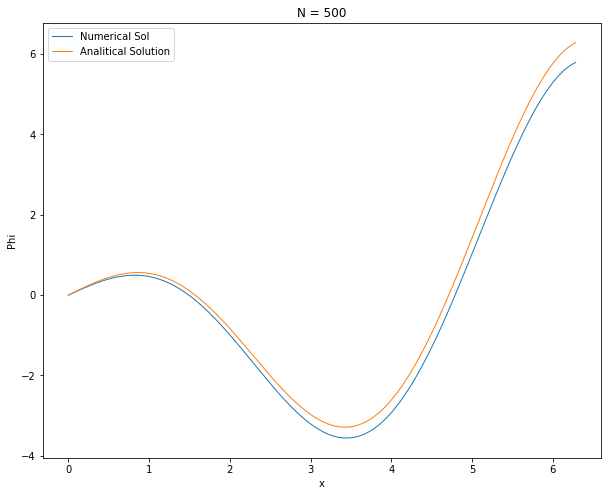

In [20]:
x_coords3 = obj3.grid_points(a2,b2,b2/N3)

analytical_values2 = analytical_sol2(x_coords3)

plt.figure(figsize=(10,8))
plt.plot(x_coords3,sol3,linewidth=1 , label='Numerical Sol')
plt.plot(x_coords3,analytical_values2,linewidth=1,label='Analitical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
plt.title(f'N = {N3}')
plt.legend()
plt.show()

Calculate the solutions with different N and compute the errors

In [21]:
Errors2,solutions2,X_coordinates2 = iteration_over_N(N_values1,PoissonSolvers.Poisson1D_Mixed_BC_Solver1,a2,b2,
                                                       phi03,gamma1,rho_function2,analytical_sol2)

Plot the solutions for different N

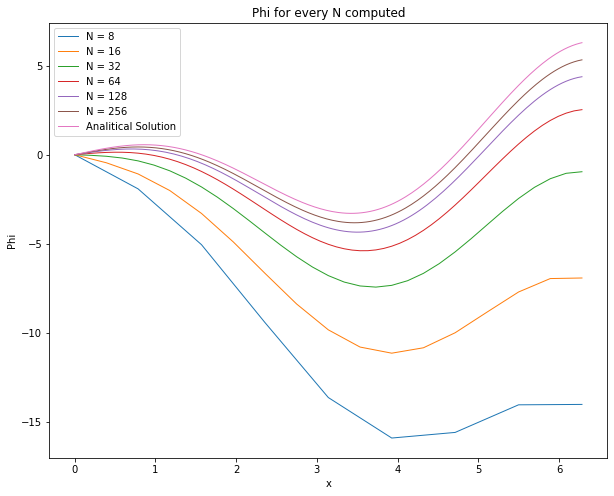

In [22]:
# Plot the solution for every N
plt.figure(figsize=(10,8))

for x_coordinates,phi_values,N_vals in zip(X_coordinates2,solutions2,N_values1):    
    plt.plot(x_coordinates,phi_values,linewidth=1 , label = f'N = {N_vals}')
    
plt.plot(x_coordinates,analytical_sol2(x_coordinates),linewidth=1,label='Analitical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
# plt.xlim([3, 4])
# plt.ylim([-4, -2])
plt.title('Phi for every N computed')
plt.legend()
plt.show()

Plot the error rate\
Determine the $L^1$, $L^2$ and $L^\infty$ norms:

In [23]:
norms2 = store_norms(Errors2)

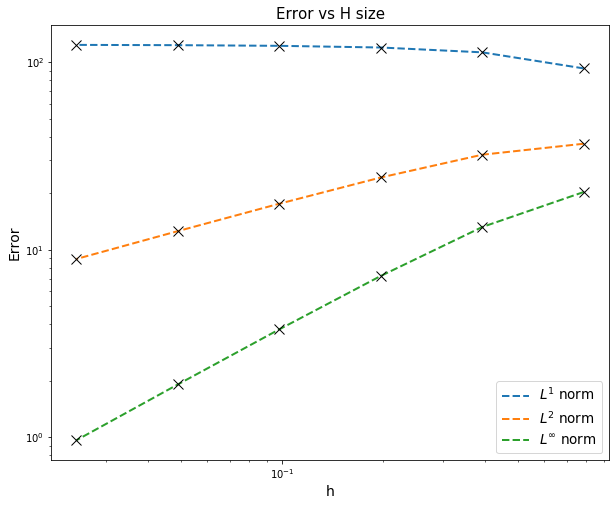

In [24]:
# Plot the errors vs h
fig , ax = plt.subplots(figsize = (10,8))
colors = ['tab:blue','tab:orange','tab:green']
norm_names = ['1','2','\infty']
for idx,norma in enumerate(norms2):
    plt.plot(h_vals,norma,'--',linewidth=2,color = colors[idx] , label = f'$L^{norm_names[idx]}$ norm')
    plt.plot(h_vals,norma,'xk',markersize=10)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('h',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('Error vs H size',fontsize = 15)
plt.legend(fontsize=13.5)
plt.show()

#### b) Write a finite difference solver for (1) and (8) with the same parameters as in problem 1.b). Approximate the derivative at the boundary via:

$$ \frac{\phi_{N}-\phi_{N-1}}{h}=\gamma $$

This system of equations can be written in matrix form as:
$$ A_h\Phi_h = R_h $$
Where
$$ A_h = \frac{1}{h^2} 
\begin{pmatrix}
2 & -1 & 0\\
-1 & 2 & -1 & 0 \\
0 & \ddots & \ddots & \ddots \\
 & \ddots & \ddots & \ddots & 0 \\
 & & -1 & 2 & -1 \\
 & & 0 & -1 & 1  
\end{pmatrix},
\Phi_h = 
\begin{pmatrix}
 \phi_1 \\
 \phi_2 \\
 \vdots \\
 \phi_{N-1}\\
 \phi_{N}
\end{pmatrix},
R_h =
\begin{pmatrix}
 \rho(x_1) + \frac{\alpha}{h^2} \\
 \rho(x_2) \\
 \vdots \\
 \rho(x_{N-1})\\
 \frac{\gamma}{h}
\end{pmatrix} $$

Example with N = 500

In [25]:
# Create object
obj4 = PoissonSolvers.Poisson1D_Mixed_BC_Solver2(a2,b2,phi03,gamma1,N3,rho_function2)

# Run Solver and obtain the solutions
sol4 = obj4.run()

# Calculate the eigenvectors:
diagg11 = 2*np.ones(N3  , dtype = float)
diagg21 = -1*np.ones(N3 - 1 , dtype = float)
diagg31 = -1*np.ones(N3 - 1 ,dtype = float)
matrixA1 = obj4.A_Matrix(N3,diagg11,diagg21,diagg31,0,1,-1)
EigVals1, EigVec1 = obj4.CalculateEigenSystem(matrixA1)

print(EigVals[:10])
print(matrixA1[-5:,-5:])

[38595.52971777 38671.60852994 38745.63978984 38817.61537908
 38887.52740475 38955.36820019 39021.1303259  39084.80657033
 39146.38995064 39205.87371354]
[[12665.14795529 -6332.57397765     0.             0.
      0.        ]
 [-6332.57397765 12665.14795529 -6332.57397765     0.
      0.        ]
 [    0.         -6332.57397765 12665.14795529 -6332.57397765
      0.        ]
 [    0.             0.         -6332.57397765 12665.14795529
  -6332.57397765]
 [    0.             0.             0.         -6332.57397765
   6332.57397765]]


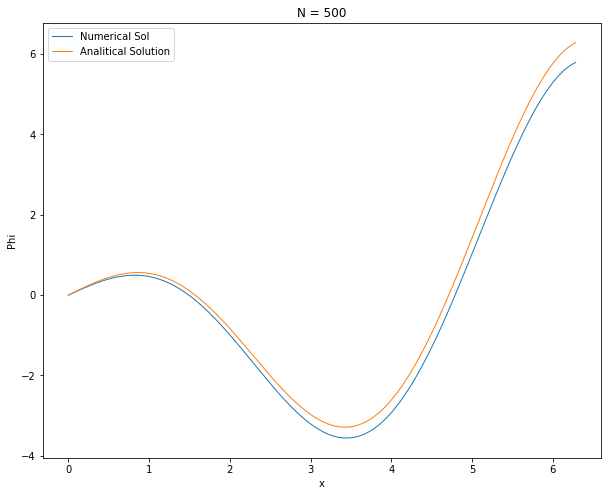

In [26]:
x_coords4 = obj4.grid_points(a2,b2,b2/N3)

analytical_values3 = analytical_sol2(x_coords4)

plt.figure(figsize=(10,8))
plt.plot(x_coords4,sol3,linewidth=1 , label='Numerical Sol')
plt.plot(x_coords4,analytical_values3,linewidth=1,label='Analitical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
plt.title(f'N = {N3}')
plt.legend()
plt.show()

Calculate the solutions with different N and compute the errors

In [27]:
Errors3,solutions3,X_coordinates3 = iteration_over_N(N_values1,PoissonSolvers.Poisson1D_Mixed_BC_Solver2,a2,b2,
                                                       phi03,gamma1,rho_function2,analytical_sol2)

Plot the solutions for different N

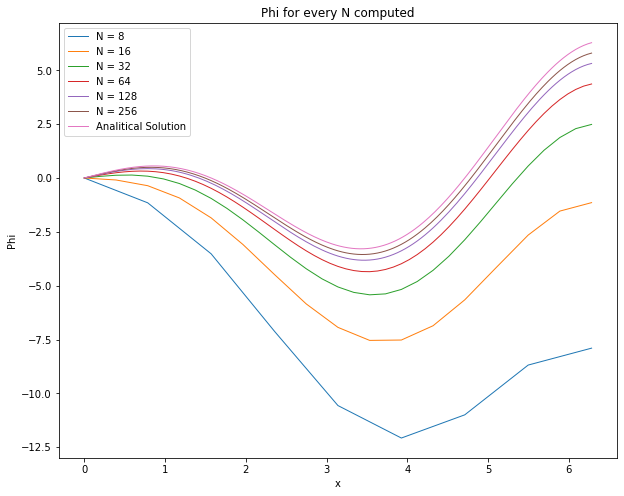

In [28]:
# Plot the solution for every N
plt.figure(figsize=(10,8))

for x_coordinates,phi_values,N_vals in zip(X_coordinates3,solutions3,N_values1):    
    plt.plot(x_coordinates,phi_values,linewidth=1 , label = f'N = {N_vals}')
    
plt.plot(x_coordinates,analytical_sol2(x_coordinates),linewidth=1,label='Analitical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
# plt.xlim([3, 4])
# plt.ylim([-4, -2])
plt.title('Phi for every N computed')
plt.legend()
plt.show()

Plot the error rate\
Determine the $L^1$, $L^2$ and $L^\infty$ norms:

In [29]:
norms3 = store_norms(Errors3)

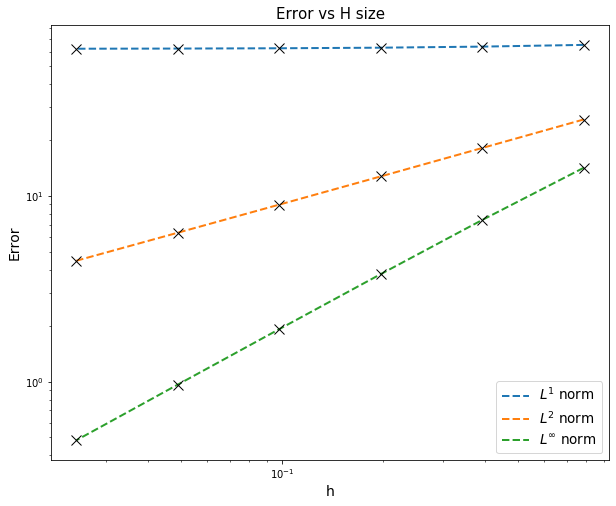

In [30]:
# Plot the errors vs h
fig , ax = plt.subplots(figsize = (10,8))
colors = ['tab:blue','tab:orange','tab:green']
norm_names = ['1','2','\infty']
for idx,norma in enumerate(norms3):
    plt.plot(h_vals,norma,'--',linewidth=2,color = colors[idx] , label = f'$L^{norm_names[idx]}$ norm')
    plt.plot(h_vals,norma,'xk',markersize=10)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('h',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('Error vs H size',fontsize = 15)
plt.legend(fontsize=13.5)
plt.show()

### 3. Periodic boundary conditions

Period: L = b - a

$$\phi(x+L)=\phi(x),\space \space \space \space \space \space \space \forall x \in Reals \space \space \space \space \space \space... (3.1) $$

There are N unknowns to be determined, since $\phi(a)=\phi(b).$ The only values of $\phi$ that need to be computed are $\phi_j$ for $0 \leq j \leq N-1$, which are expressed by:

$$ \frac{-\phi_{j+1} + 2\phi_j - \phi_{j-1}}{h^2}=\rho(x_j),\space \space \space \space \space \space 1 \leq j \leq N-2 \space \space \space \space \space \space... (3.2)$$

For $j=0$ we have:

$$ \frac{-\phi_{1} + 2\phi_0 - \phi_{-1}}{h^2}=\rho(x_0) $$

By periodicity $\phi_{-1}=\phi_{N-1}$, so we get:

$$ \frac{-\phi_{1} + 2\phi_0 - \phi_{N-1}}{h^2}=\rho(x_0) \space \space \space \space \space \space... (3.3)$$

For $j=N-1$ we have:

$$ \frac{-\phi_{N} + 2\phi_{N-1} - \phi_{N-2}}{h^2}=\rho(x_{N-1}) $$

By periodicity $\phi_{N}=\phi_{0}$, so we get:

$$ \frac{-\phi_{0} + 2\phi_{N-1} - \phi_{N-2}}{h^2}=\rho(x_{N-1}) \space \space \space \space \space \space... (3.4)$$

Combining equations (3.2),(3.3) and (3.4) we get the linear system of equations:

$$ A_h\Phi_h = R_h $$
Where
$$ A_h = \frac{1}{h^2} 
\begin{pmatrix}
    2   &   -1   &    0   & \dots & 0 &  -1 \\
   -1   &    2   &   -1   &       &   &  0    \\
    0   & \ddots & \ddots & \ddots &   &  \vdots\\
 \vdots &        & \ddots & \ddots & -1 &  0 \\
    0   &        &        &   -1   &  2 & -1 \\
   -1   &   0    & \dots  &    0   & -1 &  2  
\end{pmatrix},
\Phi_h = 
\begin{pmatrix}
 \phi_0 \\
 \phi_1 \\
 \vdots \\
 \phi_{N-1}
\end{pmatrix},
R_h =
\begin{pmatrix}
 \rho(x_0) \\
 \rho(x_1) \\
 \vdots \\
 \rho(x_{N-1})
\end{pmatrix} $$

#### a) Solvability condition of $\rho$. Does problem (1),(3.1) have a unique solution?

If we consider again that $\phi$ and $\psi$ are solutions of Poisson equations with periodic boundary conditions, that is

$$\phi(x+L)=\phi(x)$$
$$\psi(x+L)=\psi(x)$$

And we impose that

$$\phi(a)=\phi(b)=\psi(a)=\psi(b)$$

Then, by the same procedure as in 1)a) $\eta:=\phi-\psi$ satisfies the equation

$$\eta(x) = Constant$$

By the imposed boundary conditions, then $\phi(x)=\psi(x)$.

#### b) Discretize the problem by equation (3.2) and write a solver. Check the eigenvalues and determine if matrix A is invertible.

In [31]:
class Poisson_Finite_Diff_Order1_PeriodicBC_Solver:
    def __init__(self, a , b , N , rho):
        
        # Extreme points x0 = a, xN = b
        self.a = a
        self.b = b
        
        # Number of mesh elements
        self.N = N
        
        # Density function
        self.rho = rho
        
        # Step size:
        self.h = self.b/self.N
    
        # Grid points
        self.grid_points = np.arange(self.a , self.b + self.h , self.h)  #x_coords
    
    def Return_Coords(self):
        return self.grid_points
    
    def CalculateEigenSystem(self,A_matrix):
        EigenVals, EigenVec = np.linalg.eig(A_matrix)
        return EigenVals, EigenVec
    
    # We define a method to construct a tridiagonal matrix:
    def A_Matrix(self,N_Dim ,val1, val2, val3, k1=0, k2=1, k3=-1):
        # The method constructs three diagonal matrices with k_i indicating the shift from the main diagonal
        ''' val1,2,3: 1-D arrays
            k1,2,3: Diagonals where the arrays will be positioned'''
        
        tridiagonal_mat = np.diag(val1, k1) + np.diag(val2, k2) + np.diag(val3, k3) # Three main diagonals
        
        # Modify the last row of the matrix where the calculation of the derivative is done
        tridiagonal_mat[0][N_Dim-1] = -1 # Modify last element from last row and last column to 1
        tridiagonal_mat[N_Dim-1][0] = -1
        
        A_mat = (1/self.h**2)*tridiagonal_mat # Multiply by the factor of 1/h^2
        
        return A_mat
    
    def R_Matrix(self):
        ''' We construct the R matrix to solve the Ax=R system of equations. We define the function rho applied to the
        grid points and then replace the end points with the boundary conditions.'''
        
        return self.rho(self.grid_points[:-1])
    
    def LinearSolver(self,A_matrix,R_matrix):
        ''' We solve the linear system of equations A_matrix*X = R_matrix for X, then insert the boundary conditions
        at the start and end of the array'''
        
        sol = list(np.array(np.linalg.solve(A_matrix,R_matrix)))
        sol.append(sol[0])
        return sol
    
    def run(self):
        
        diagonal1 = 2*np.ones(self.N  , dtype = float) # Main diagonal must be of length N
        diagonal2 = -1*np.ones(self.N - 1 , dtype = float)
        diagonal3 = -1*np.ones(self.N - 1 ,dtype = float)
        AMatrix = self.A_Matrix(self.N , diagonal1 , diagonal2 , diagonal3 , 0 , 1 , -1)
        
        RMatrix = self.R_Matrix()
        
        solution = self.LinearSolver(AMatrix,RMatrix)
        
        return solution

Example:

In [32]:
Ntest=8
atest=0.0
btest=2.0

objp = Poisson_Finite_Diff_Order1_PeriodicBC_Solver(atest,btest,Ntest,rho_function2)

# Calculate the eigenvectors:
diag11 = 2*np.ones(Ntest  , dtype = float)
diag21 = -1*np.ones(Ntest - 1 , dtype = float)
diag31 = -1*np.ones(Ntest - 1 ,dtype = float)
matrixA1 = objp.A_Matrix(Ntest,diag11,diag21,diag31,0,1,-1)

hh = btest/Ntest
AM = matrixA1*hh**2

print('A Matrix:\n',AM)
print(' ')

# Eigenvalues
vals,vecs = objp.CalculateEigenSystem(AM)
print('Eigenvalues: ',vals)
print(' ')
print(f'The eigenvalue {min(vals)} is zero with machine precision, so matrix A is not invertible')
print(' ')

# Determinant:
det1 = np.linalg.det(AM)
print(f'The determinant is: {det1}, or 0')

A Matrix:
 [[ 2. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0.  0.  0. -1.  2.]]
 
Eigenvalues:  [1.11022302e-16 5.85786438e-01 2.00000000e+00 4.00000000e+00
 3.41421356e+00 5.85786438e-01 2.00000000e+00 3.41421356e+00]
 
The eigenvalue 1.1102230246251565e-16 is zero with machine precision, so matrix A is not invertible
 
The determinant is: 1.7763568394002524e-15, or 0


#### c) Impose the condition $\phi(0)=0$ and rewrite the system of equations by the discretization (3.2). Check the eigenvalues of the new matrix A'.

The problem is similar to a Dirichlet boundary condition with $\phi(a=0)=\phi(b)=0$, in this case we have N-1 unknowns: $\phi_j$ for $1 \leq j \leq N-1$. The first two equations can be written as:

$j=0:$
$$\frac{-\phi_1+2\phi_0-\phi_{N-1}}{h^2}=\frac{-\phi_1-\phi_{N-1}}{h^2}=\rho(x_0)\space \space \space \space \space \space... (3.5)$$

$j=1:$
$$\frac{-\phi_2+2\phi_1-\phi_{0}}{h^2}=\frac{-\phi_2+2\phi_{1}}{h^2}=\rho(x_1)\space \space \space \space \space \space... (3.6)$$

As we have 2 equations with $\phi_1$ as an unknown, we substract both expressions and obtain 1 equation for $\phi_1$:

$$\frac{3\phi_1-\phi_2+\phi_{N-1}}{h^2}=\rho(x_1)-\rho(x_0)\space \space \space \space \space \space... (3.7)$$

On the other hand, the last equation of the system can be written as:

$j=N-1:$
$$\frac{-\phi_{0} + 2\phi_{N-1} - \phi_{N-2}}{h^2}=\frac{2\phi_{N-1} - \phi_{N-2}}{h^2}=\rho(x_{N-1})\space \space \space \space \space \space... (3.8)$$

Equation (3.7) and (3.8) can be coupled with the rest of the system of linear equations and the system must be solved for $\phi_1,\phi_2,\dots,\phi_{N-1}$.

$\phi_0=\phi_N=0$ in this case.

The new matrix system can be written as:
$$ A'_h\Phi_h = R_h $$
Where
$$ A'_h = \frac{1}{h^2} 
\begin{pmatrix}
    3   &   -1   &    0   & \dots & 0 &  1 \\
   -1   &    2   &   -1   &       &   &  0    \\
    0   & \ddots & \ddots & \ddots &   &  \vdots\\
 \vdots &        & \ddots & \ddots & -1 &  0 \\
    0   &        &        &   -1   &  2 & -1 \\
    0   &   0    & \dots  &    0   & -1 &  2  
\end{pmatrix},
\Phi_h = 
\begin{pmatrix}
 \phi_1 \\
 \phi_2 \\
 \vdots \\
 \phi_{N-1}
\end{pmatrix},
R_h =
\begin{pmatrix}
 \rho(x_1)-\rho(x_0) \\
 \rho(x_2) \\
 \vdots \\
 \rho(x_{N-1})
\end{pmatrix} $$

Example

In [33]:
Ntest=15
atest=0.0
btest=2.0

objp = PoissonSolvers.Poisson1D_Periodic_BC_Solver1(atest,btest,Ntest,rho_function2)

# Calculate the eigenvectors:
diag11 = 2*np.ones(Ntest - 1 , dtype = float)
diag21 = -1*np.ones(Ntest - 2 , dtype = float)
diag31 = -1*np.ones(Ntest - 2 ,dtype = float)
matrixA1 = objp.A_Matrix(Ntest,diag11,diag21,diag31,0,1,-1)

hh = btest/Ntest
AM = matrixA1*hh**2

print('A Matrix:\n',AM)
print(' ')

# Eigenvalues
vals,vecs = objp.CalculateEigenSystem(AM)
print('Eigenvalues: ',vals)
print(' ')
print(f'The minimum eigenvalue {min(vals)} not equal to 0, so matrix A is invertible')
print(' ')

# Determinant:
det1 = np.linalg.det(AM)
print(f'The determinant is: {det1}, different from zero ')

A Matrix:
 [[ 3. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
 
Eigenvalues:  [3.9562952  3.94985582 3.61803399 3.56366296 3.         2.86776748
 2.20905693 2.         0.05014418 0.17290908 0.43633704 0.66173879
 1.38196601 

#### d) Set $a = 0$, $b = 2\pi$ and $\rho=4sin(2x)$. Test the solver for different values of N, plot the results and calculate the error rate between the solutions and the analytical solution $\phi(x)=sin(2x)$.

In [34]:
# Iteration over all N, calculation of all solutions and errors

def iteration_over_N_Periodic(N_Values,Solver,X0,XN,RHO_FUNCTION,AnalyticalSolFunction):
    
    ''' This function takes a list of the sizes of the grid discretization N, ex: N_Values=[10,100,200,300]
    and solves the poisson equation with a given Solver(Dirichlet,Neumann,...) with end points of the grid
    X0 and XN, and boundary conditions BC1, BC2. A RHO_FUNCTION must be specified and the analytical solution
    of the model to calculate the error.'''

    Errors = [] # List to store the mean square errors
    solutions = [] # List to store the solutions
    X_coordinates = [] # List to store the coordinates for each mesh size

    for N_val in N_Values:
        # Create object
        obj =  Solver(X0,XN,N_val,RHO_FUNCTION)

        # Run Solver and obtain the solutions
        sol = obj.run()
        solutions.append(sol) # Store the solution

        # Coordinates
        x_coordss = obj.grid_points(X0, XN, XN/N_val)
        X_coordinates.append(x_coordss) #Store the grid

        # Analytical Solution
        analytical_sols = AnalyticalSolFunction(x_coordss)

        # Error
        Errors.append(error_func(analytical_sols,sol))

    return Errors,solutions,X_coordinates    

In [35]:
# Parameters:
aP = 0.0
bP = 2*np.pi

rho_function3 = lambda x: 4*np.sin(2*x)

Analytical solution to the model:
$$\phi(x)=sin(2x)$$

In [36]:
analytical_sol3 = lambda x: np.sin(2*x)

In [37]:
N_values1

array([  8,  16,  32,  64, 128, 256], dtype=int32)

In [38]:
ErrorsP,SolutionsP,X_coordP = iteration_over_N_Periodic(N_values1,PoissonSolvers.Poisson1D_Periodic_BC_Solver1,aP,bP,
                                                        rho_function3,analytical_sol3)

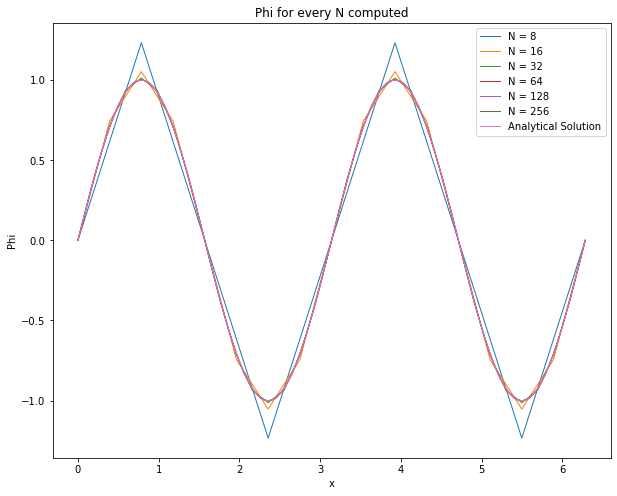

In [39]:
# Plot the solution for every N
plt.figure(figsize=(10,8))

for x_coordinates,phi_values,N_vals in zip(X_coordP,SolutionsP,N_values1):    
    plt.plot(x_coordinates,phi_values,linewidth=1 , label = f'N = {N_vals}')
    
plt.plot(x_coordinates,analytical_sol3(x_coordinates),linewidth=1,label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('Phi')
# plt.xlim([3, 4])
# plt.ylim([-4, -2])
plt.title('Phi for every N computed')
plt.legend()
plt.show()

Plot the error rate\
Determine the $L^1$, $L^2$ and $L^\infty$ norms:

In [40]:
normsP = store_norms(ErrorsP)

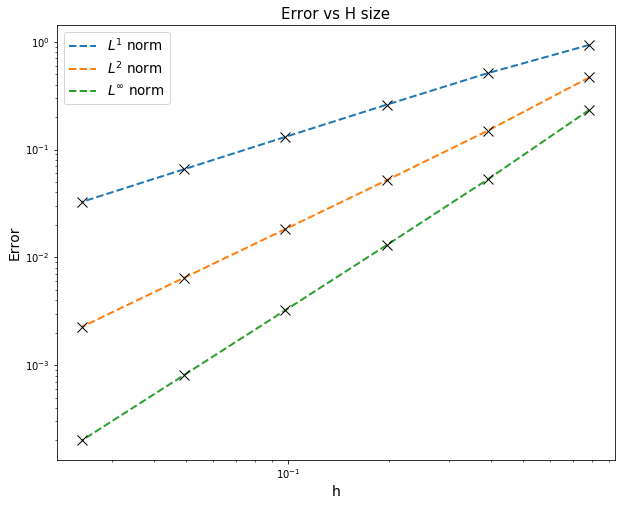

In [41]:
# Plot the errors vs h
fig , ax = plt.subplots(figsize = (10,8))
colors = ['tab:blue','tab:orange','tab:green']
norm_names = ['1','2','\infty']
for idx,norma in enumerate(normsP):
    plt.plot(h_vals,norma,'--',linewidth=2,color = colors[idx] , label = f'$L^{norm_names[idx]}$ norm')
    plt.plot(h_vals,norma,'xk',markersize=10)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('h',fontsize = 14)
plt.ylabel('Error',fontsize = 14)
plt.title('Error vs H size',fontsize = 15)
plt.legend(fontsize=13.5)
plt.show()

In [42]:
Nd = 256
L = 2*np.pi
h = L/Nd

################################################

a = np.zeros((Nd+1,Nd+1))

d1 = 2*np.ones(Nd)
d2 = -1*np.ones(Nd-1)
d3 = -1*np.ones(Nd-1)
trid = np.diag(d1, 0) + np.diag(d2, -1) + np.diag(d3, 1) # Three main diagonals 
trid[0][Nd-1] = -1
trid[Nd-1][0] = -1

a[:Nd,:Nd] = trid

bot_r = h**3*np.ones(Nd)
# bot_r = 3*np.ones(Nd)
a[Nd,:Nd] = bot_r

# last_c = 4*np.ones(Nd)
last_c = h**2 * np.ones(Nd)
a[:Nd,Nd]=last_c

a.round(2)

array([[ 2., -1.,  0., ...,  0., -1.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [-1.,  0.,  0., ..., -1.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [43]:
objp = PoissonSolvers.Poisson1D_Periodic_BC_Solver2(0,L,Nd,rho_function3)

In [44]:
c = objp.A_Matrix(Nd ,d1, d2, d3, 0, 1,-1, bot_r , last_c)
c.round(2)

array([[ 3.32009e+03, -1.66005e+03,  0.00000e+00, ...,  0.00000e+00,
        -1.66005e+03,  1.00000e+00],
       [-1.66005e+03,  3.32009e+03, -1.66005e+03, ...,  0.00000e+00,
         0.00000e+00,  1.00000e+00],
       [ 0.00000e+00, -1.66005e+03,  3.32009e+03, ...,  0.00000e+00,
         0.00000e+00,  1.00000e+00],
       ...,
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  3.32009e+03,
        -1.66005e+03,  1.00000e+00],
       [-1.66005e+03,  0.00000e+00,  0.00000e+00, ..., -1.66005e+03,
         3.32009e+03,  1.00000e+00],
       [ 2.00000e-02,  2.00000e-02,  2.00000e-02, ...,  2.00000e-02,
         2.00000e-02,  0.00000e+00]])

In [46]:
v = objp.R_Matrix(Nd,objp.grid_points(0,L,L/Nd))
v.shape

(257,)

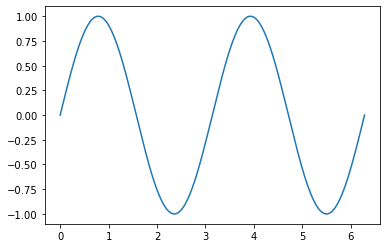

In [47]:
sol1 = objp.run()
plt.plot(objp.grid_points(0,L,L/Nd),sol1)

In [48]:
len(sol1[:Nd])

256

In [49]:
rho_function4 = lambda x: 4*np.sin(2*x) + 2

In [50]:
objp1 = PoissonSolvers.Poisson1D_Periodic_BC_Solver2(0,L,Nd,rho_function4)

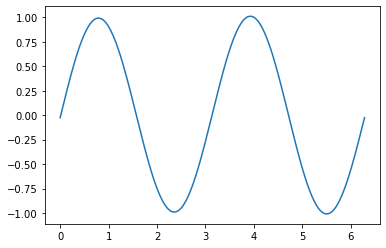

In [51]:
sol2 = objp1.run()
plt.plot(objp1.grid_points(0,L,L/Nd),sol2[:])